# ADA - Homework 4

In [85]:
#Usefull imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, datasets, feature_extraction, model_selection
import networkx as nx

## Question 1
#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)


### 1. A naive analysis

In [2]:
data = pd.DataFrame.from_csv('lalonde.csv')
data.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [3]:
not_treat = data[data['treat'] == 0]
treat = data[data['treat'] == 1]
print(len(not_treat))
print(len(treat))

429
185


The first thing that we should notice is that there is more than twice non participants than participants so we should keep in mind to normalize the results.

In [41]:
cat_to_name = {
    'treat' : 'Participation or not in training',
    'age' : 'Age',
    'educ' :'Years of education',
    'race' : 'Race',
    'married' : 'Married or not',
    'nodegree' : 'Absence of degree or not',
    're74': 'Income in 1974',
    're75' : 'Income in 1975',
    're78' : 'Income in 1978'
}

In [50]:
def plot_barchart(not_treat_df, treat_df, cat, bins_range, yticks_range):
    cat_name = cat_to_name[cat]
    fig = plt.figure()
    fig.set_size_inches(12, 5)

    plt.subplot(121)
    not_treat_n, _, _ = plt.hist(not_treat_df[cat], bins = bins_range, rwidth = 0.8)
    plt.yticks(yticks_range)
    plt.xlabel(cat_name)
    plt.ylabel('Number of non participants')
    plt.title('Repartition of ' + cat_name+ ' of non participants')

    plt.subplot(122)
    treat_n, _, _ = plt.hist(treat_df[cat], bins = bins_range, rwidth = 0.8)
    plt.yticks(yticks_range)
    plt.xlabel(cat_name)
    plt.ylabel('Number of participants')
    plt.title('Repartition of ' + cat_name+ ' of participants')

    plt.show()
    return not_treat_n, treat_n

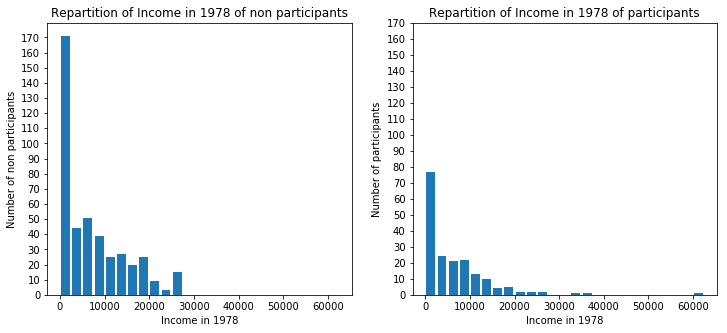

In [51]:
bins_range = range(0, 65000, 2500)
not_treat_n, treat_n = plot_barchart(not_treat, treat, 're78', bins_range, range(0, 180, 10))

From this analysis one could easily think that the training does not improve the incomes.

In [7]:
labels = []
for i in range(25):
    labels.append('[' + str(bins_range[i])+ ', ' + str(bins_range[i+1]) + ']')

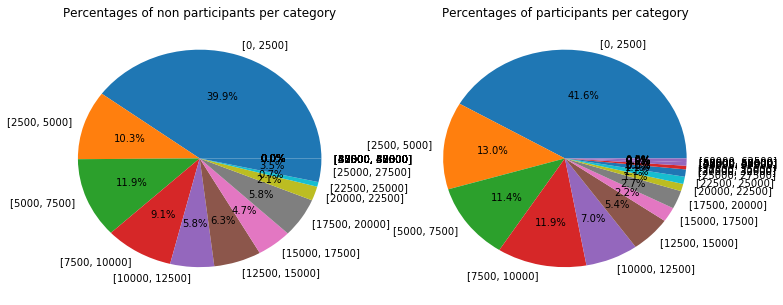

In [8]:
fig = plt.figure()
fig.set_size_inches(12,5)

plt.subplot(121)
plt.pie(not_treat_n, autopct='%1.1f%%', labels = labels)
plt.title('Percentages of non participants per category')

plt.subplot(122)
plt.pie(treat_n, autopct='%1.1f%%', labels = labels)
plt.title('Percentages of participants per category')

plt.show()

Here we can still arrive to the conclusion that the training did not improve the incomes.

In [48]:
def plot_box(not_treat_df, treat_df, cat, yticks_range):
    cat_name = cat_to_name[cat]
    fig= plt.figure()
    fig.set_size_inches(12,5)

    plt.subplot(121)
    plt.boxplot(not_treat_df[cat])
    plt.title('Distribution of '+cat_name+' in non participants')
    plt.xticks([1], [cat_name])
    plt.yticks(yticks_range)
    
    plt.subplot(122)
    plt.boxplot(treat_df[cat])
    plt.title('Distribution of '+cat_name+' in participants')
    plt.xticks([1], [cat_name])
    plt.yticks(yticks_range)
    
    plt.show()

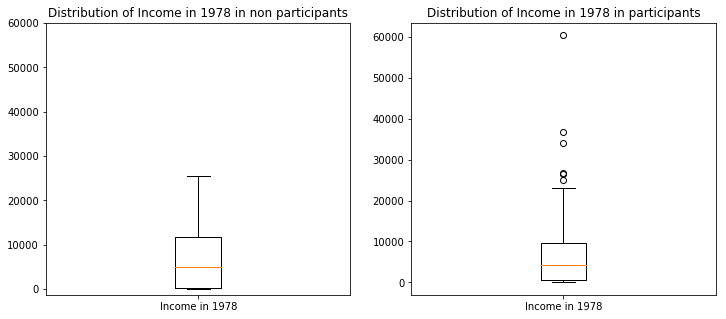

In [49]:
plot_box(not_treat, treat, 're78', range(0, 65000, 10000))

In [11]:
not_treat['re78'].median()

4975.505

In [12]:
treat['re78'].median()

4232.309

With this visualisation we could conclude that the training increased a lot the income of the best students. Though the medians are not very different.

### 2. A closer look at the data

#### Age

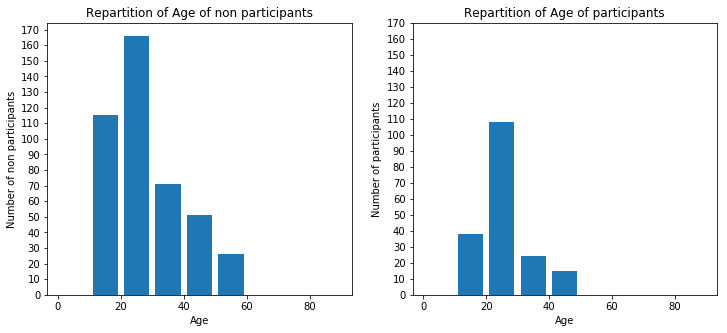

In [52]:
not_treat_age, treat_age = plot_barchart(not_treat, treat, 'age', bins_range = range(0, 100, 10), 
                                                yticks_range = range(0, 180, 10))

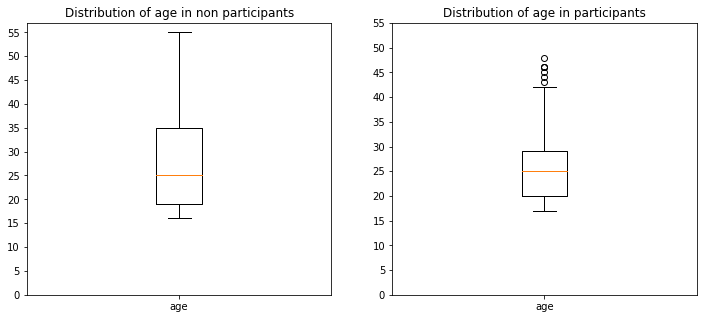

In [14]:
plot_box(not_treat, treat,'age', range(0, 60, 5))

#### Educ

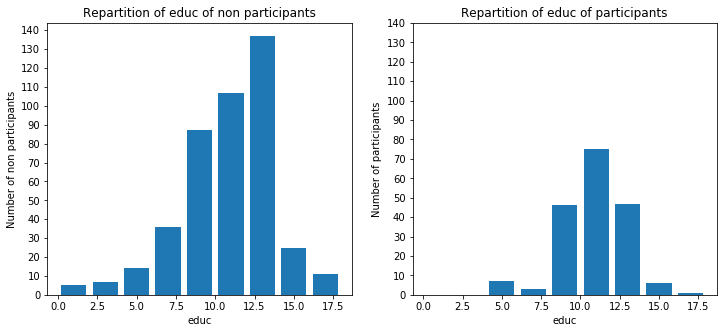

In [15]:
not_treat_educ, treat_educ = plot_barchart(not_treat, treat,'educ', bins_range = range(0, 20, 2), 
                                                yticks_range = range(0, 150, 10))

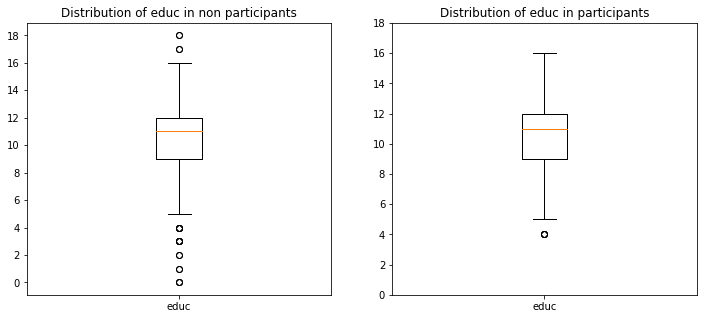

In [16]:
plot_box(not_treat, treat,'educ', range(0, 20, 2))

#### Race

In [17]:
def get_repartition_race(df):
    res = {'black' : 0, 'hispanic':0, 'white':0}
    res['black'] = len(df[df['black'] == 1])
    res['hispanic'] = len(df[df['hispan'] == 1])
    res['white'] = len(df) - res['black'] - res['hispanic']
    return res

In [34]:
def plot_race_pie(not_treat, treat):
    not_treat_race = get_repartition_race(not_treat)
    treat_race = get_repartition_race(treat)

    fig = plt.figure()
    fig.set_size_inches(12,5)

    plt.subplot(121)
    plt.pie(list(not_treat_race.values()), autopct='%1.1f%%', labels = not_treat_race.keys())
    plt.title('Percentages of non participants per category')

    plt.subplot(122)
    plt.pie(list(treat_race.values()), autopct='%1.1f%%', labels =treat_race.keys())
    plt.title('Percentages of participants per category')

    plt.show()

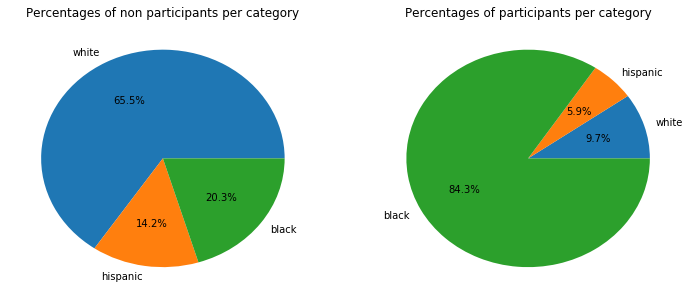

In [35]:
plot_race_pie(not_treat, treat)

#### Married

In [19]:
not_treat_married = len(not_treat[not_treat['married'] == 1])
print('The proportion of married people in the non participants is ', np.round(not_treat_married/len(not_treat),2))

treat_married = len(treat[treat['married'] == 1])
print('The proportion of married people in the participants is ', np.round(treat_married/len(treat),2))

The proportion of married people in the non participants is  0.51
The proportion of married people in the participants is  0.19


#### Nodegree

In [20]:
not_treat_nodegree = len(not_treat[not_treat['nodegree'] == 1])
print('The proportion of people without any degree in the non participants is ', np.round(not_treat_nodegree/len(not_treat),2))

treat_nodegree = len(treat[treat['nodegree'] == 1])
print('The proportion of people without any degree in the participants is ', np.round(treat_nodegree/len(treat),2))

The proportion of people without any degree in the non participants is  0.6
The proportion of people without any degree in the participants is  0.71


#### Re74

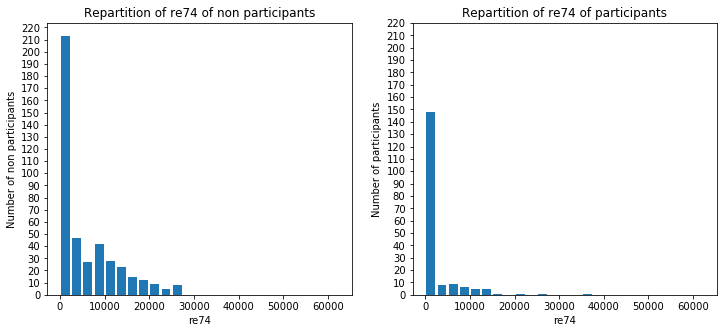

In [21]:
not_treat_re74, treat_re74 = plot_barchart(not_treat, treat,'re74', bins_range = range(0, 65000, 2500), 
                                                yticks_range = range(0, 230, 10))

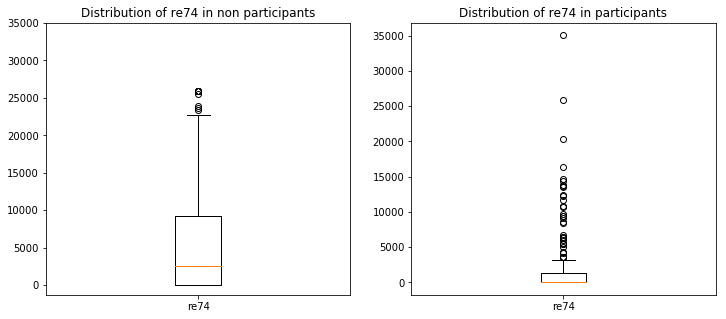

In [22]:
plot_box(not_treat, treat,'re74', range(0, 40000, 5000))

#### Re75

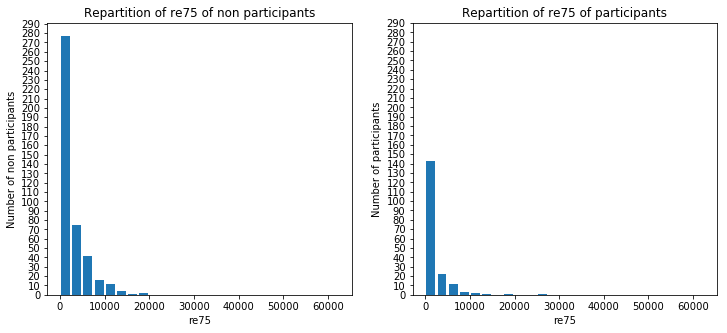

In [23]:
not_treat_re75, treat_re75 = plot_barchart(not_treat, treat,'re75', bins_range = range(0, 65000, 2500), 
                                                yticks_range = range(0, 300, 10))

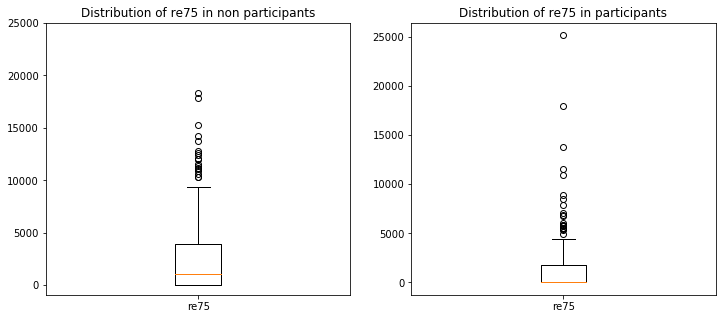

In [24]:
plot_box(not_treat, treat,'re75', range(0, 30000, 5000))

### 3. A propensity score model

Propensity score according to lecture 5 : $e(x) = Pr(Z = 1 | x)$

Doc : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score

In [25]:
logistic = linear_model.LogisticRegression()

In [26]:
cols = data.columns[1:] #Get rid of 'treat' column
logistic.fit(X= data[cols], y = data['treat'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
scores = logistic.predict_proba(X = data[cols])
#To know which column is for 'treat' = 1, we query the classes attribute of the model
#As the columns of scores are in the same order
print(logistic.classes_)
#We can see that the propensity scores are the second column
#We perform a quick check, as we know the 5 first have 'treat' = 1, let's compare the probabilitiies
scores[:5, :]
#It should indeed be the second column

[0 1]


array([[ 0.54192649,  0.45807351],
       [ 0.84801994,  0.15198006],
       [ 0.24903448,  0.75096552],
       [ 0.32598022,  0.67401978],
       [ 0.32940963,  0.67059037]])

In [28]:
propensity = {}
for i, idx in enumerate(data.index):
    propensity[idx] = scores[i, 1]

In [29]:
propensity['NSW4']

0.67401978133624496

### 4. Balancing the dataset via matching

Networkx max_weight_matching doc : https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.matching.max_weight_matching.html#networkx.algorithms.matching.max_weight_matching

In [30]:
G = nx.Graph()
G.add_nodes_from(data.index)

for not_treated in not_treat.index:
    for treated in treat.index:
        w = - (propensity[not_treated] - propensity[treated])
        G.add_edge(not_treated, treated, weight = w)

In [31]:
mate = nx.max_weight_matching(G, maxcardinality=True)

In [32]:
mate['NSW1']

'PSID362'

In [33]:
not_treat_subgroup = [x for x in mate.keys() if x.startswith('PSID')]
treat_subgroup = [y for y in mate.keys() if y.startswith('NSW')]
not_treat_subdf = not_treat.loc[not_treat_subgroup]
treat_subdf = treat.loc[treat_subgroup]

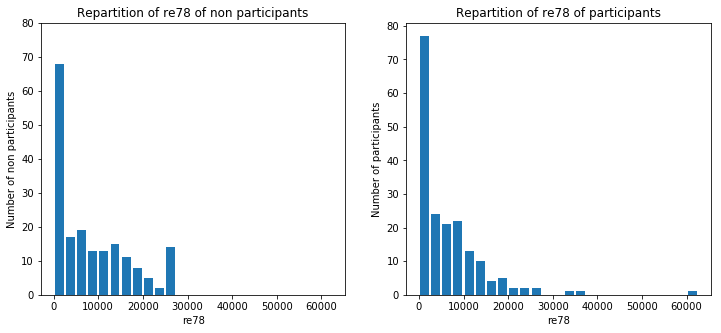

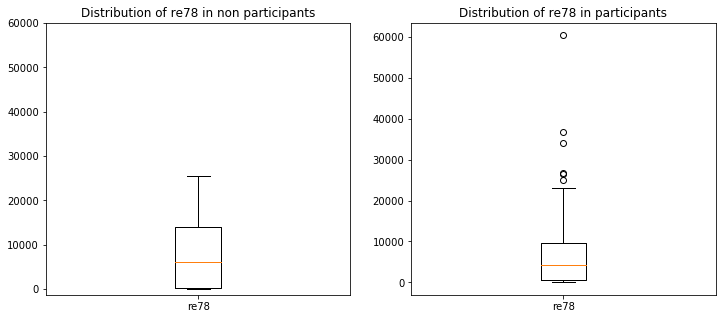

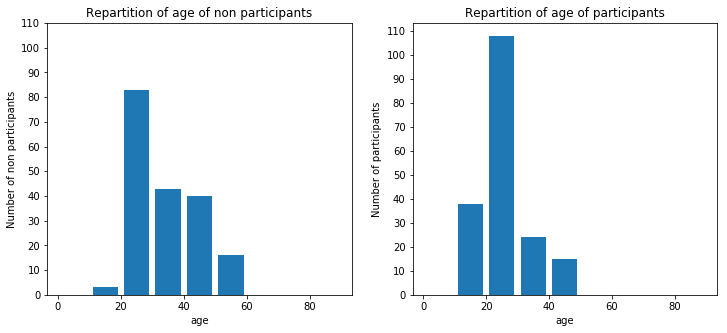

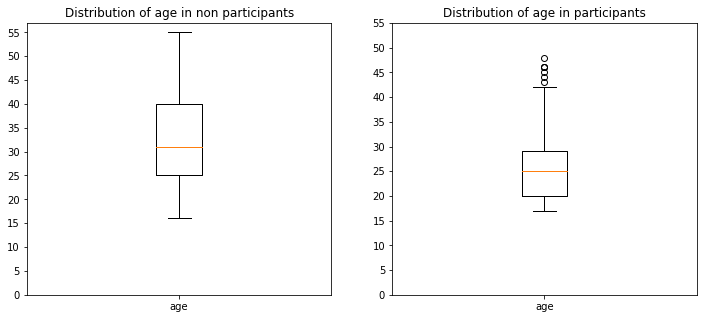

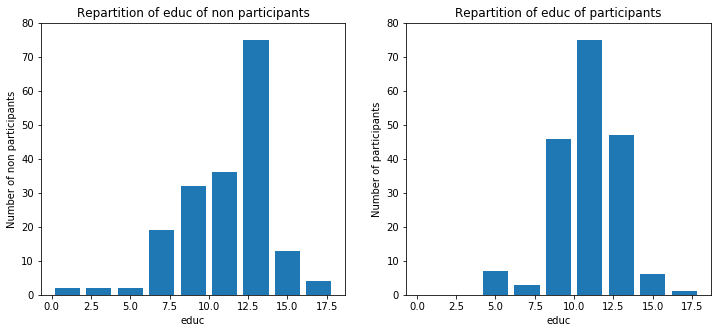

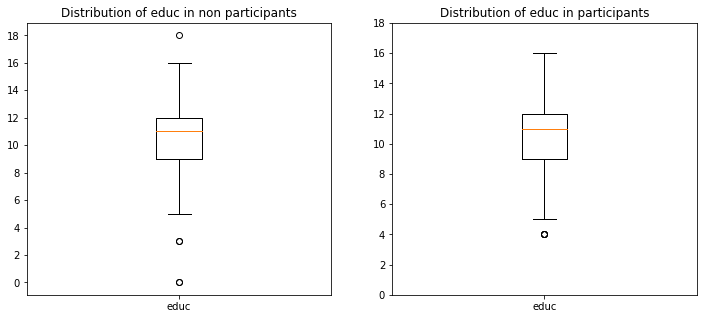

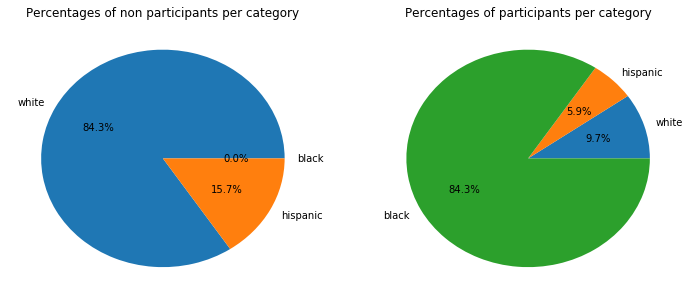

The proportion of married people in the non participants is  0.9
The proportion of married people in the participants is  0.19
The proportion of people without any degree in the non participants is  0.5
The proportion of people without any degree in the participants is  0.71


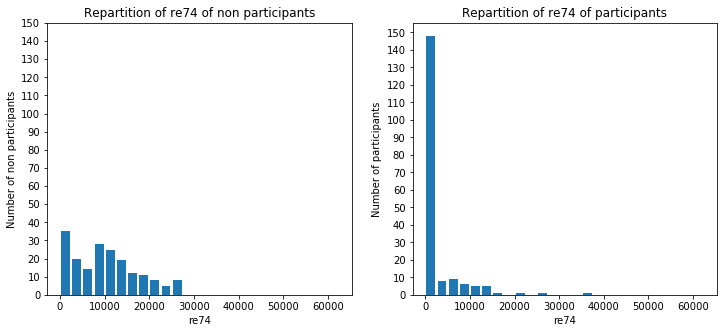

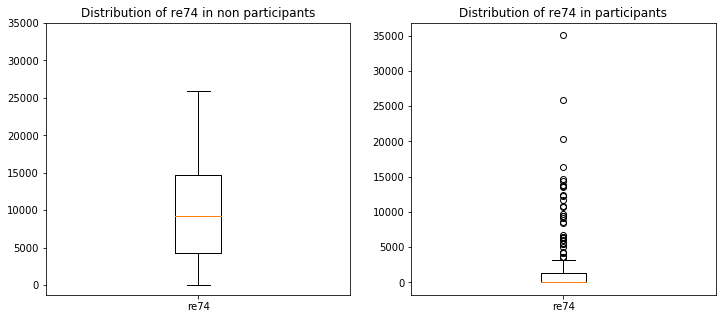

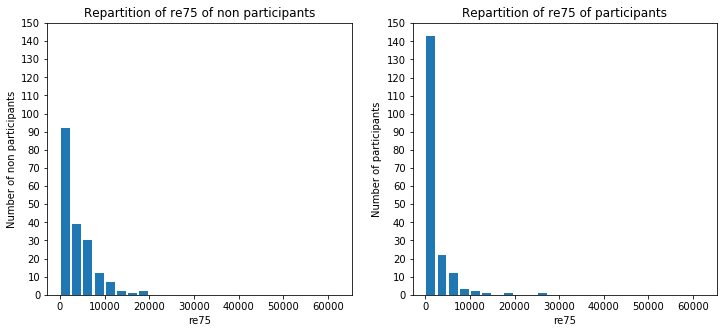

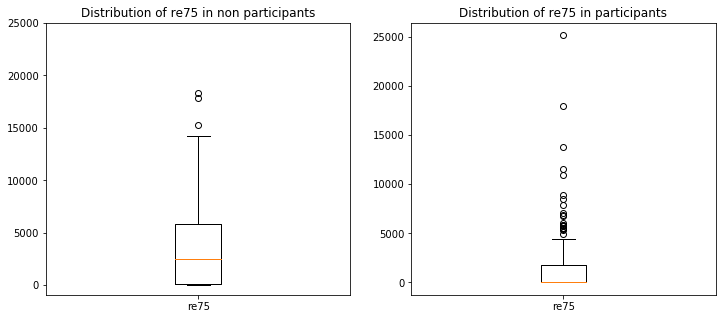

In [40]:
_,_= plot_barchart(not_treat_subdf, treat_subdf, 're78', range(0, 65000, 2500), range(0, 90, 10))

plot_box(not_treat_subdf, treat_subdf, 're78', range(0, 65000, 10000))

_, _ = plot_barchart(not_treat_subdf, treat_subdf, 'age', bins_range = range(0, 100, 10), 
                                                yticks_range = range(0, 120, 10))

plot_box(not_treat_subdf, treat_subdf,'age', range(0, 60, 5))

_, _ = plot_barchart(not_treat_subdf, treat_subdf,'educ', bins_range = range(0, 20, 2), 
                                                yticks_range = range(0, 90, 10))

plot_box(not_treat_subdf, treat_subdf,'educ', range(0, 20, 2))

plot_race_pie(not_treat_subdf, treat_subdf)

not_treat_subdf_married = len(not_treat_subdf[not_treat_subdf['married'] == 1])
print('The proportion of married people in the non participants is ', np.round(not_treat_subdf_married/len(not_treat_subdf),2))

treat_subdf_married = len(treat_subdf[treat_subdf['married'] == 1])
print('The proportion of married people in the participants is ', np.round(treat_subdf_married/len(treat_subdf),2))

not_treat_subdf_nodegree = len(not_treat_subdf[not_treat_subdf['nodegree'] == 1])
print('The proportion of people without any degree in the non participants is ', np.round(not_treat_subdf_nodegree/len(not_treat_subdf),2))

treat_subdf_nodegree = len(treat_subdf[treat_subdf['nodegree'] == 1])
print('The proportion of people without any degree in the participants is ', np.round(treat_subdf_nodegree/len(treat_subdf),2))

_, _ = plot_barchart(not_treat_subdf, treat_subdf,'re74', bins_range = range(0, 65000, 2500), 
                                                yticks_range = range(0, 160, 10))

plot_box(not_treat_subdf, treat_subdf,'re74', range(0, 40000, 5000))

_, _ = plot_barchart(not_treat_subdf, treat_subdf,'re75', bins_range = range(0, 65000, 2500), 
                                                yticks_range = range(0, 160, 10))

plot_box(not_treat_subdf, treat_subdf,'re75', range(0, 30000, 5000))

**Analysis** :

### 5. Balancing the groups further

### 6. A less naive analysis

## Question 2 : Applied ML

### 1.

In [80]:
news20 = datasets.fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

In [82]:
news20['data'][1]

"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks."

In [78]:
#news20['data'][1] #Result without remove=(...)

"From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.\n\nGuy Kuo <guykuo@u.washington.edu>\n"

In [83]:
vectorizer = feature_extraction.text.TfidfVectorizer()
tf_idf = vectorizer.fit_transform(news20.data)
print('(nb docs, nb terms) : ',tf_idf.shape) #Without remove... ->(11314, 130107)

(nb docs, nb terms) :  (11314, 101631)


In [87]:
def split_data(data):
    train_data, t_data = model_selection.train_test_split(data, test_size = 0.2)
    test_data, valid_data = model_selection.train_test_split(t_data, test_size = 0.5)
    return train_data, test_data, valid_data

In [88]:
train_data, test_data, valid_data = split_data(news20.data)

### 2.